# Model Training

---

In this notebook, I will train a Reinforcement Learning Agent to collect yellow bananas and avoid blue bananas.

### Import necessary packages

In [1]:
from unityagents import UnityEnvironment
from agent import Agent
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

### Start the Bananas environment

In [2]:
env = UnityEnvironment(file_name="./Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### Train the DQN Agent

Now I train the agent to solve the environment using basic DQN.

In [5]:
# initialize agent
agent = Agent(state_size=state_size, 
              action_size=action_size)

# train and get scores
scores = agent.train(env)

Episode 100	Average Score: 1.31
Episode 200	Average Score: 5.56
Episode 300	Average Score: 8.77
Episode 400	Average Score: 10.42
Episode 499	Average Score: 13.00
Environment solved in 399 episodes!	Average Score: 13.00


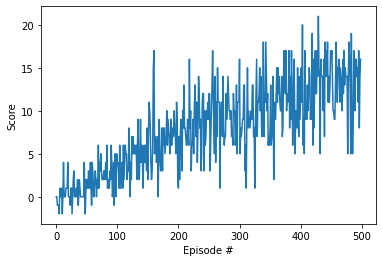

In [7]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Double DQN

Implementing the Double DQN architecture from this [paper](https://papers.nips.cc/paper/3964-double-q-learning)

In [8]:
# initialize agent
double_agent = Agent(state_size=state_size,
                     action_size=action_size,
                     double_dqn=True)

# train and get scores
scores = double_agent.train(env)

Episode 100	Average Score: 0.29
Episode 200	Average Score: 3.42
Episode 300	Average Score: 6.69
Episode 400	Average Score: 9.77
Episode 500	Average Score: 12.84
Episode 544	Average Score: 13.07
Environment solved in 444 episodes!	Average Score: 13.07


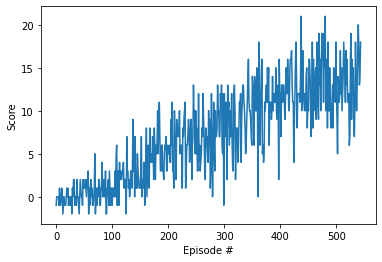

In [9]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Dueling DQN

Implementing the Dueling DQN architecture from this [paper](https://arxiv.org/pdf/1511.06581.pdf)

In [8]:
# initialize agent
dueling_agent = Agent(state_size=state_size,
                      action_size=action_size,
                      dueling=True)

# train and get scores
scores = dueling_agent.train(env)

Episode 100	Average Score: 1.36
Episode 200	Average Score: 4.73
Episode 300	Average Score: 7.26
Episode 400	Average Score: 10.97
Episode 465	Average Score: 13.04
Environment solved in 365 episodes!	Average Score: 13.04


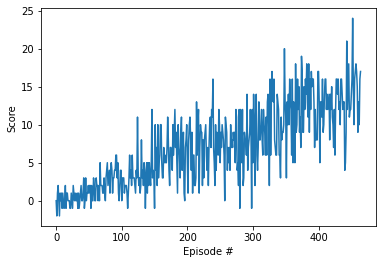

In [9]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Prioritized Experience Replay

Implementing Prioritized Experience Replay from this [paper](https://arxiv.org/search?searchtype=author&query=Schaul%2C+T)

In [5]:
# initialize agent
per_agent = Agent(state_size=state_size,
                             action_size=action_size,
                             per=True)

# train and get scores
scores = per_agent.train(env)

Episode 100	Average Score: 0.52
Episode 200	Average Score: 3.28
Episode 300	Average Score: 6.73
Episode 400	Average Score: 9.13
Episode 500	Average Score: 11.43
Episode 600	Average Score: 12.18
Episode 655	Average Score: 13.04
Environment solved in 555 episodes!	Average Score: 13.04


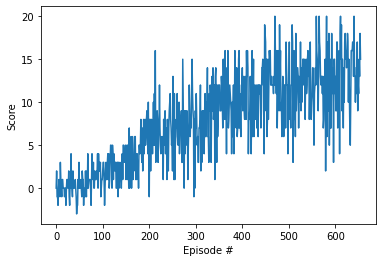

In [7]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Double + Dueling DQN

In [10]:
# initialize agent
double_dueling_agent = Agent(state_size=state_size,
                             action_size=action_size,
                             double_dqn=True,
                             dueling=True)

# train and get scores
scores = double_dueling_agent.train(env)

Episode 100	Average Score: 1.15
Episode 200	Average Score: 4.55
Episode 300	Average Score: 6.88
Episode 400	Average Score: 10.48
Episode 497	Average Score: 13.01
Environment solved in 397 episodes!	Average Score: 13.01


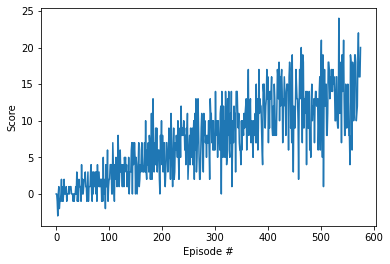

In [7]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Double + Dueling + PER DQN

In [5]:
# initialize agent
double_dueling_per_agent = Agent(state_size=state_size,
                             action_size=action_size,
                             double_dqn=True,
                             dueling=True,
                             per=True)

# train and get scores
scores = double_dueling_per_agent.train(env)

Episode 100	Average Score: 0.78
Episode 200	Average Score: 3.23
Episode 300	Average Score: 7.73
Episode 400	Average Score: 9.60
Episode 500	Average Score: 11.95
Episode 552	Average Score: 13.01
Environment solved in 452 episodes!	Average Score: 13.01


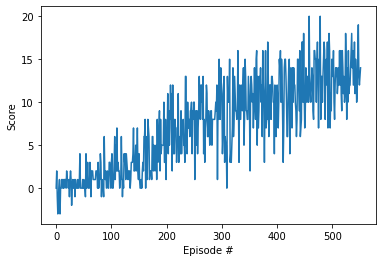

In [7]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()